In [3]:
%cd ..

/home/anthony/workspace/yt-data


In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # use cpu because I'm training on gpu

# from thumbs.experiments.pokemjon_big_both import PokemonExperiment
from thumbs.experiments.cats import CatExperiment
from thumbs.train import load_weights
from thumbs.viz import show_samples, visualize_preprocessed_image
from thumbs.data import load_and_preprocess_image
import tensorflow as  tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MultiLabelBinarizer


/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:

# This is your input data, replace it with your actual data.
pokemon_classes = [
        ["Pikachu", ["Electric"]],
    ["Bulbasaur", ["Grass", "Poison"]],
    ["Charizard", ["Fire", "Flying"]],
    # Add more Pokemon here...
]

# We separate the names and the classes.
names, classes = zip(*pokemon_classes)

# We use MultiLabelBinarizer to convert class labels to binary vectors.
mlb = MultiLabelBinarizer()
binary_classes = mlb.fit_transform(classes)

# Now, binary_classes is a binary matrix representation of the labels.
# You can convert it to a list of binary vectors like this:
binary_vectors = binary_classes.tolist()

# If you want to see what classes correspond to each position in the binary vectors, you can do:
class_labels = mlb.classes_

print(class_labels.shape)
print("Names:", names)
print("Binary vectors:", binary_vectors)
print("Class labels:", class_labels)


(5,)
Names: ('Pikachu', 'Bulbasaur', 'Charizard')
Binary vectors: [[1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [0, 1, 1, 0, 0]]
Class labels: ['Electric' 'Fire' 'Flying' 'Grass' 'Poison']


# Load type/stat info

In [6]:
df = pd.read_csv('/home/anthony/workspace/yt-data/data/pokemon/stats.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
# Remove duplicates in the # column
df = df.drop_duplicates(subset=['#'])
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


# Load pokemon images

Images in /home/anthony/workspace/yt-data/data/pokemon
['282-mega.jpg', '582.jpg', '340.jpg', '570.jpg', '136.jpg', '531-mega.jpg', '335.jpg', '96.jpg', '581.jpg', '153.jpg']
Found 820 total files
Found 819 jpgs


100%|██████████| 819/819 [00:00<00:00, 942.70it/s]
/home/anthony/workspace/yt-data/thumbs/data.py:295: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(jpgs)


<Figure size 640x480 with 0 Axes>

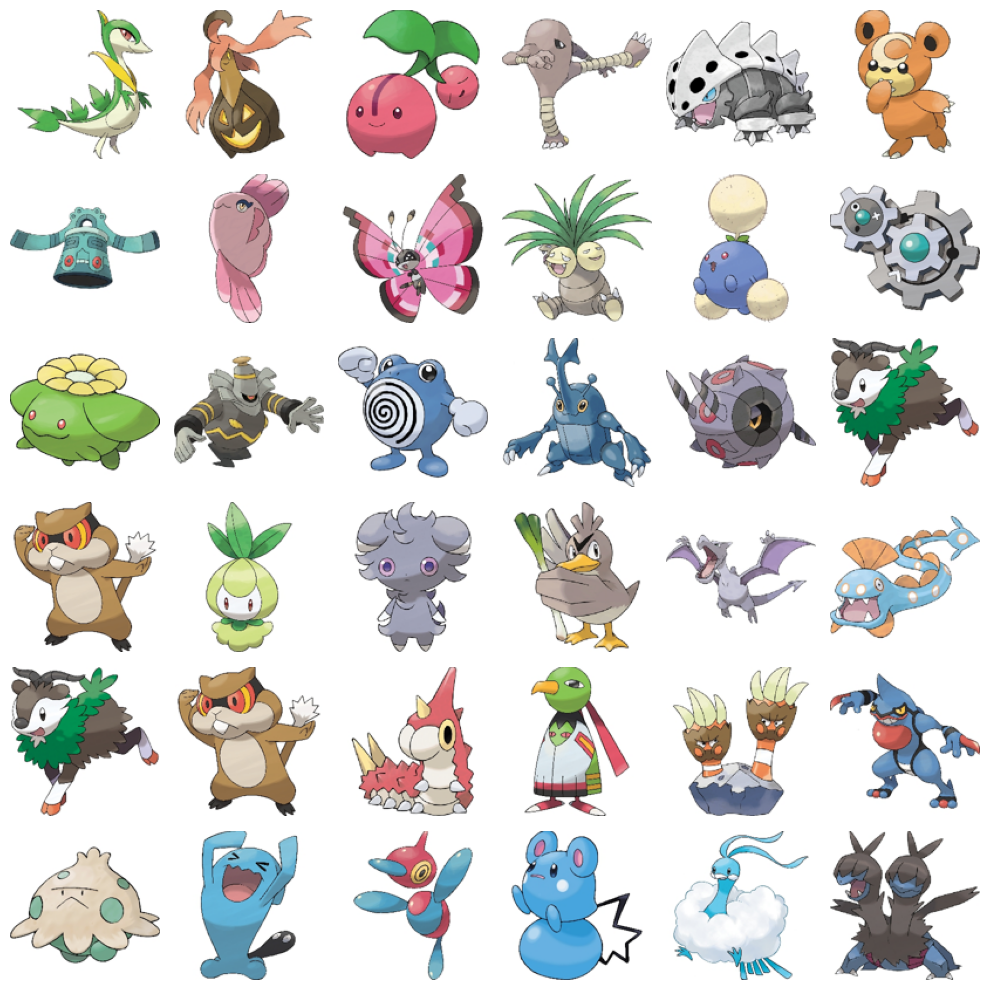

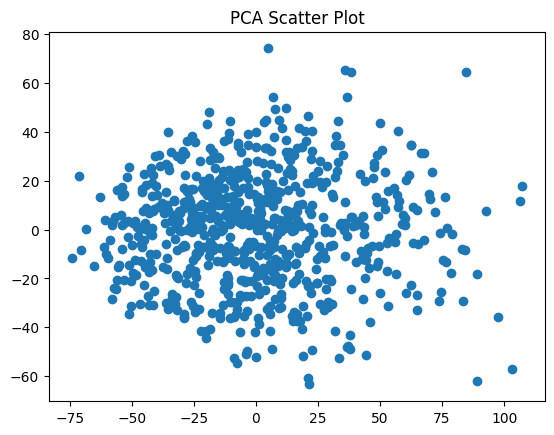

(18,)
Binary vectors: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1, 

In [8]:
from thumbs.data import get_pokemon_and_names, create_pokemon_embeddings
images = get_pokemon_and_names((128,128,3))
embeddings, mlb = create_pokemon_embeddings(images)


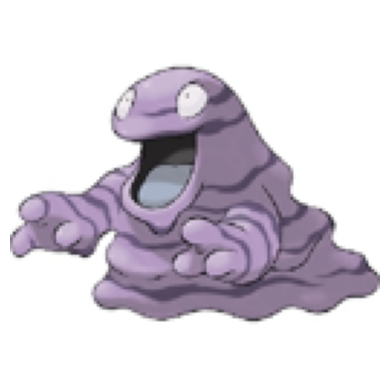

[('Poison',)]

In [9]:

# Get mew
id = 88
visualize_preprocessed_image(images[id])
mlb.inverse_transform(embeddings[id].reshape(1, -1))


# Try to do this all with just keras layers

In [43]:
from keras.layers import StringLookup, Flatten, Embedding, Multiply, Reshape, Conv2DTranspose, BatchNormalization, ReLU, Concatenate
from tensorflow.keras import Input, Model
import tensorflow as tf
from typing import List

def create_model(vocab: List[str], zdim=100):

    noise_input = Input(shape=(zdim,))
    types_input = Input(shape=(None,), dtype=tf.string, ragged=True)
    lookup = StringLookup(output_mode='multi_hot', name='string_lookup', vocabulary=vocab)

    # Preprocessing 
    types = lookup(types_input)
    model_input = Concatenate()([noise_input, types])

    # Main model
    x = Reshape((1, 1, -1))(model_input)
    x = Conv2DTranspose(256, kernel_size=5, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2DTranspose(128, kernel_size=5, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2DTranspose(3, kernel_size=5, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    model = Model([noise_input, types_input], x)
    model.summary()
    return model




# Get all unique values from Type 1 and Type 2 in df
types = list(set(df['Type 1'].unique().tolist() + df['Type 2'].unique().tolist()))
types = [type.lower() for type in types if type == type] # remove nan
types.sort()

print(types)

# layer = StringLookup(output_mode='multi_hot')
model = create_model(types)
layer = model.get_layer('string_lookup')



['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_31 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 input_30 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 string_lookup (StringLookup)   (None, 19)           0           ['input_31[0][0]']               
                                                                                                  
 concatenate_5 (Concat

In [21]:
layer(['water']).numpy()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1.], dtype=float32)

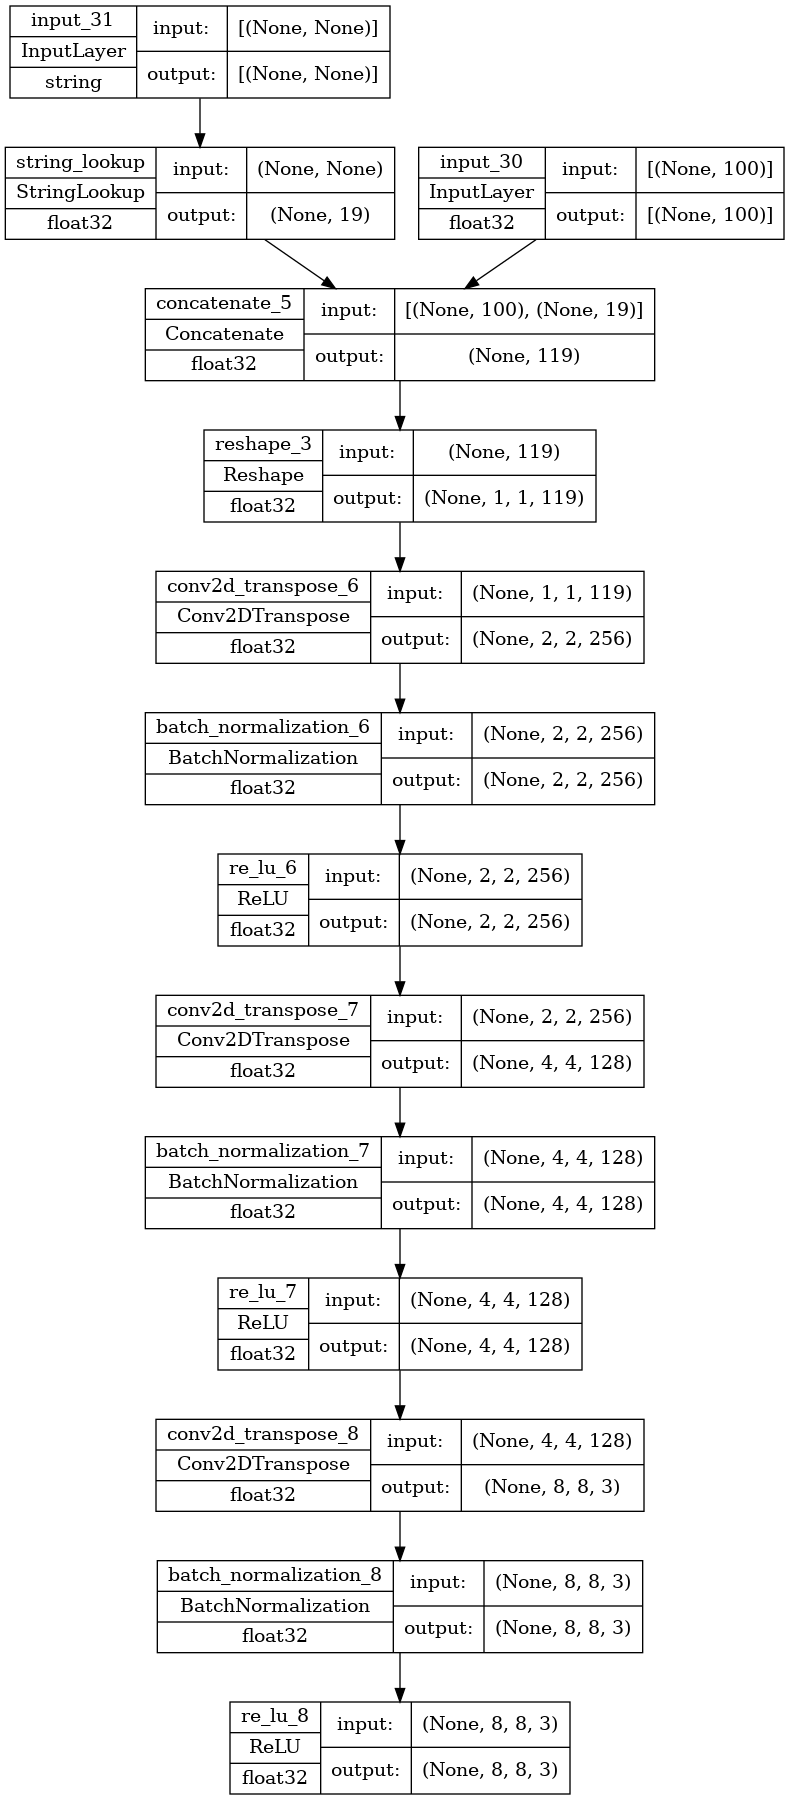

In [44]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_dtype=True)

In [49]:
# Create a dictionary of pokemon id to their Type 1 and Type 2
pokemon_types = {}
for index, row in df.iterrows():
    type1 = row['Type 1'].lower()
    type2 = row['Type 2']
    types = [type1]
    if type2 == type2:
        types.append(type2.lower())

    pokemon_types[row['#']] = types

pokemon_types[150]

['psychic']